# Importing all the necessary libraries

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.models import load_model
import csv
import pandas as pd
from tensorflow.math import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.losses import MeanSquaredError
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
import matplotlib.patches as patches
import seaborn as sns

# Car Detection

In [188]:
def convert_to_array(images):
    try:
        image = cv2.imread(images)
        if image is not None:
            image = cv2.resize(image, (300, 300))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0) 
            return image
        else:
            return None
    except Exception as e:
        print(f"Error processing image {images}: {e}")
        return None

In [189]:
csv_file = "test_images.csv"

# Write to CSV
with open(csv_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["test images"])
    # Write the data
    for image in os.listdir('car_detection_dataset/testing_images'):
        writer.writerow([image])

print(f"CSV file '{csv_file}' created successfully!")

CSV file 'test_images.csv' created successfully!


In [190]:
test_dataset = pd.read_csv('test_images.csv')

In [ ]:
predictor = load_model('car_detection_model_1.h5')

In [192]:
# Ensure columns for bounding box values exist
test_dataset['x_min'] = None
test_dataset['y_min'] = None
test_dataset['x_max'] = None
test_dataset['y_max'] = None

# Process each image and store predictions
for i in range(len(test_dataset)):
    file_name = 'car_detection_dataset/testing_images/' + test_dataset.iloc[i, 0]
    img = convert_to_array(file_name)  # Convert image to array
    img = np.array(img, dtype=np.float32) / 255.0


    x = predictor.predict(img)  # Model output
    print(f"Prediction for {file_name}: {x}")

    if x.shape == (1, 4):  # Check if the output has the correct shape
        x_min, y_min, x_max, y_max = x[0]  # Unpack predictions

        # Store predictions in the DataFrame
        test_dataset.at[i, 'x_min'] = x_min
        test_dataset.at[i, 'y_min'] = y_min
        test_dataset.at[i, 'x_max'] = x_max
        test_dataset.at[i, 'y_max'] = y_max




1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction for car_detection_dataset/testing_images/vid_5_25100.jpg: [[391.49292 194.0974  482.05493 234.09163]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Prediction for car_detection_dataset/testing_images/vid_5_25120.jpg: [[367.32193 192.58032 452.79907 230.37958]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Prediction for car_detection_dataset/testing_images/vid_5_25140.jpg: [[334.54562 202.91072 435.8889  241.16196]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Prediction for car_detection_dataset/testing_images/vid_5_25160.jpg: [[320.275   200.10414 412.40222 235.92656]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Prediction for car_detection_dataset/testing_images/vid_5_25180.jpg: [[300.39655 200.42775 417.3424  245.89226]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Prediction for car_detection_dataset/testing_images/vid_5_25200.jpg: [[310.31015 203.43205 420.93634 245.67737]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Prediction for car_detection_dataset/testing_images/

In [193]:
test_dataset

test images       x_min       y_min       x_max       y_max
0    vid_5_25100.jpg   391.49292  194.097397  482.054932  234.091629
1    vid_5_25120.jpg   367.32193  192.580322  452.799072  230.379578
2    vid_5_25140.jpg  334.545624  202.910721  435.888885  241.161957
3    vid_5_25160.jpg  320.274994  200.104141  412.402222  235.926559
4    vid_5_25180.jpg  300.396545   200.42775  417.342407  245.892258
..               ...         ...         ...         ...         ...
170  vid_5_31700.jpg  387.285553  179.484344  486.945312  225.195755
171  vid_5_31720.jpg   26.821856  186.346298  128.259155  232.244186
172    vid_5_400.jpg  240.984833  183.421173  360.749115  230.650055
173    vid_5_420.jpg  226.308716  179.680145  348.506683  226.457275
174    vid_5_440.jpg  215.061905  182.447189  339.603668  228.790131

[175 rows x 5 columns]

In [194]:
sample_data = test_dataset.sample(16).reset_index(drop=True)

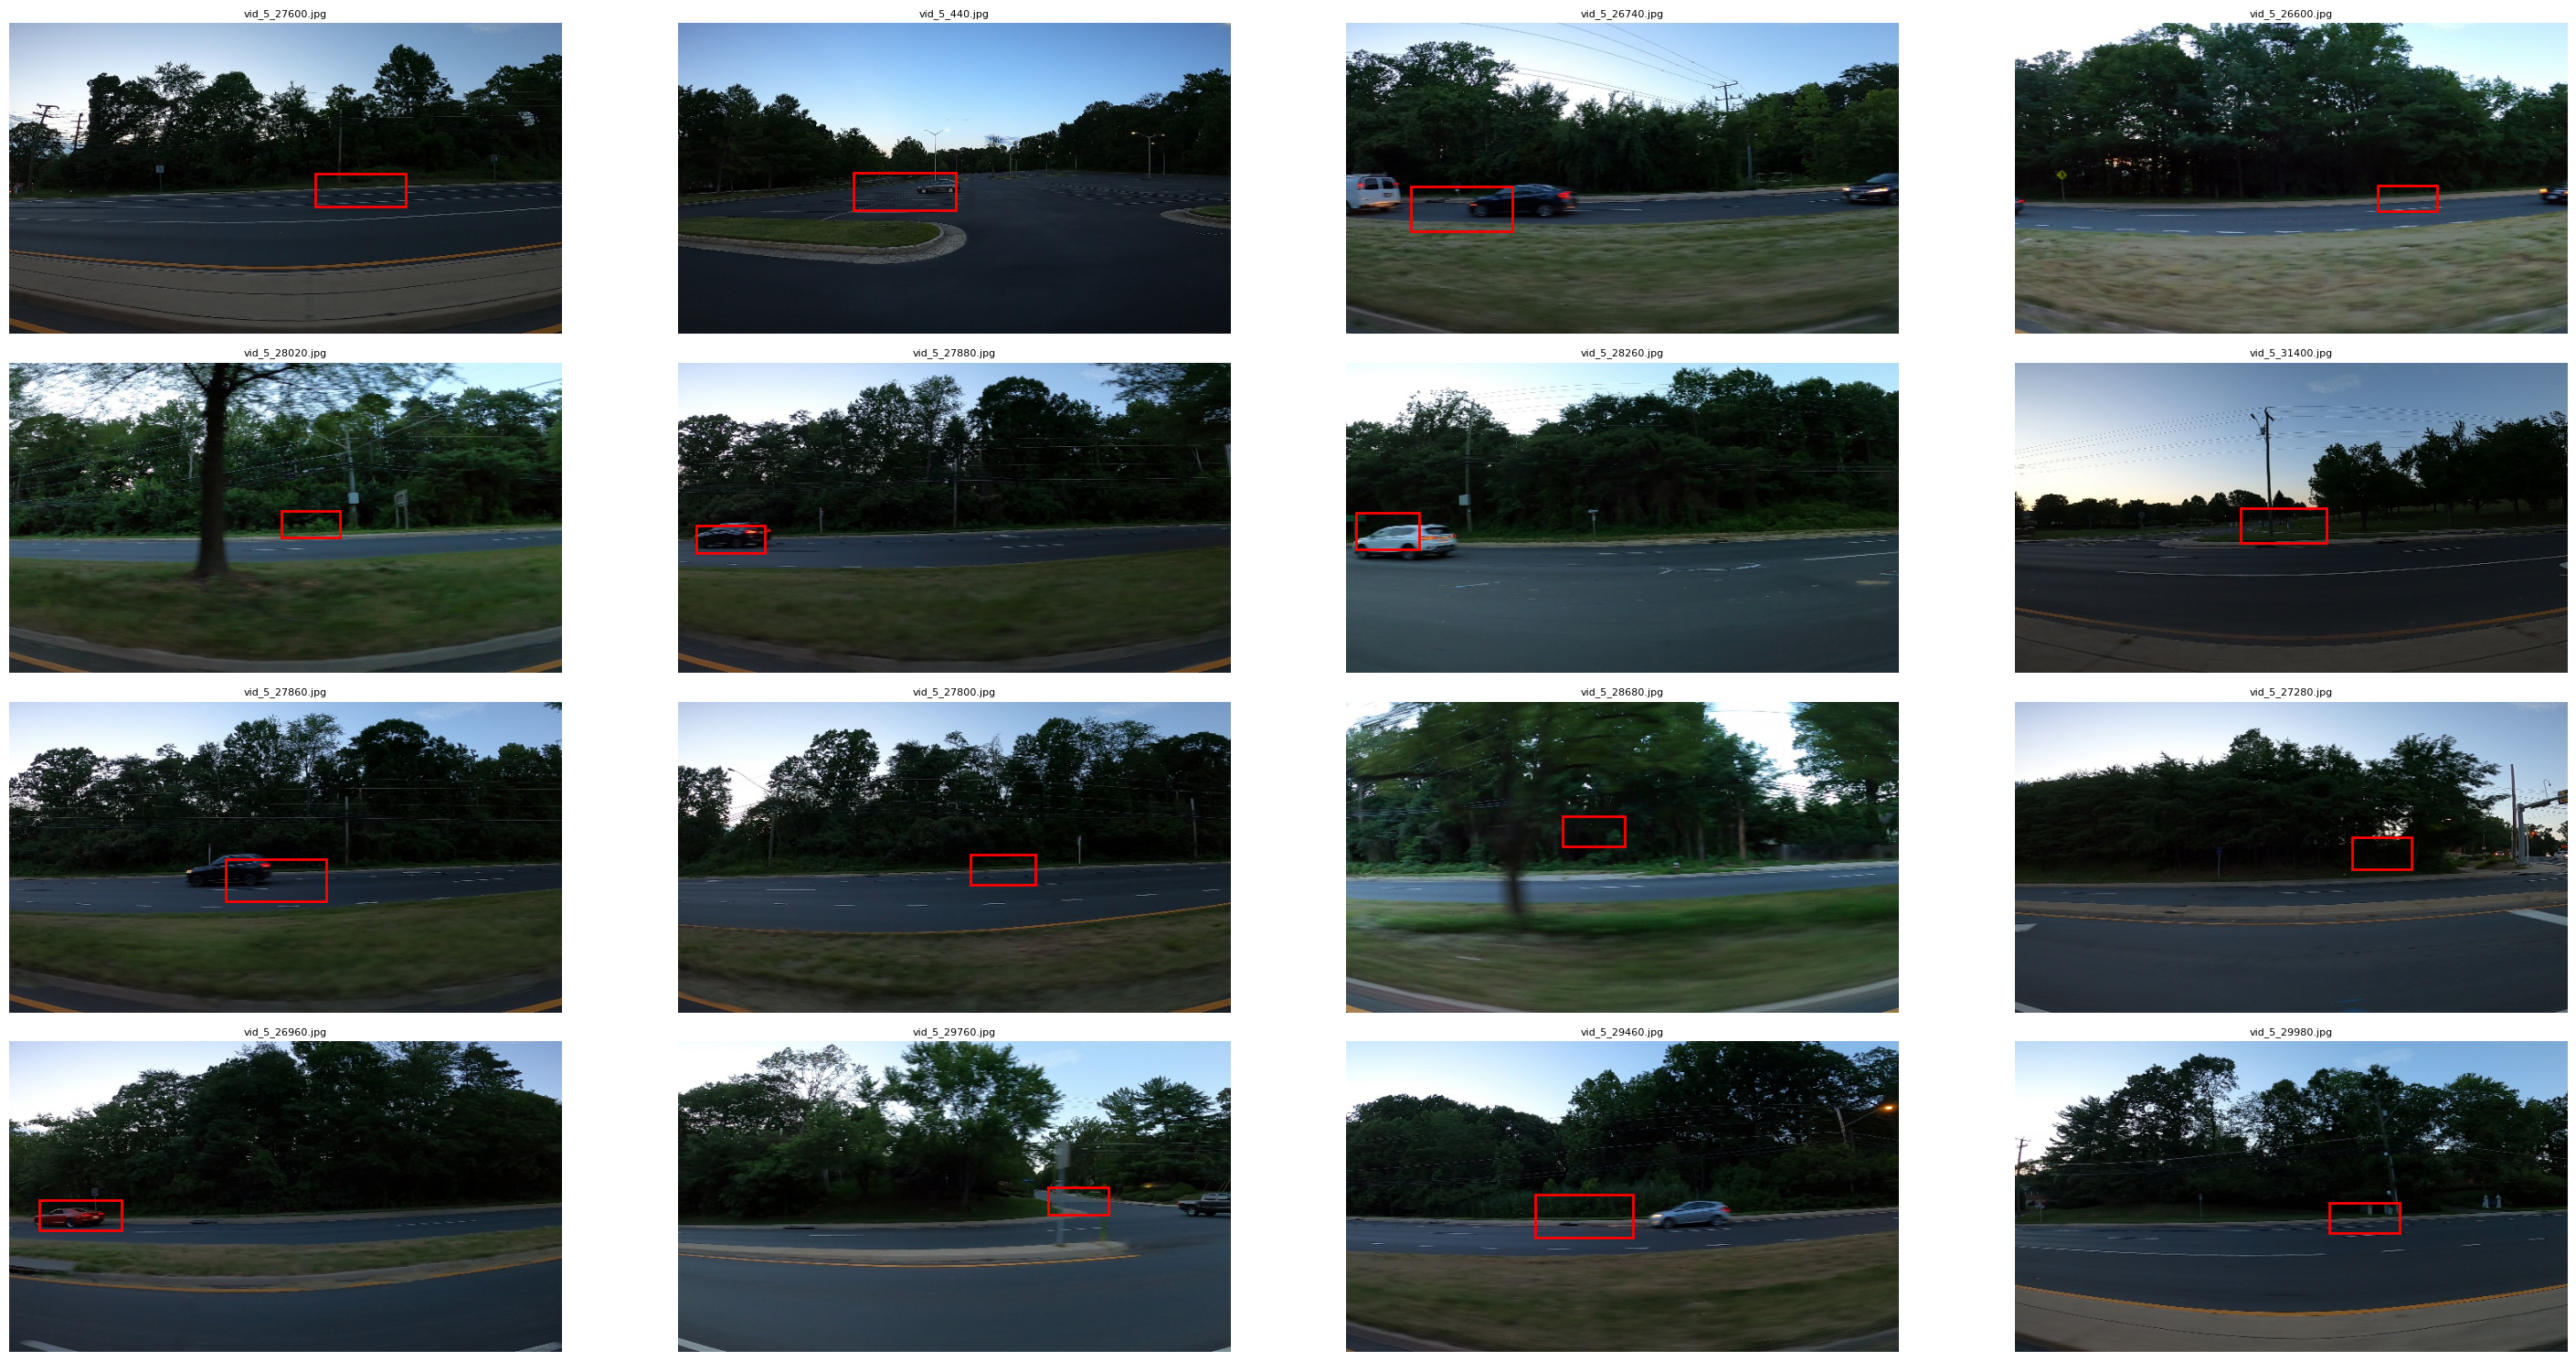

In [195]:
fig, axes = plt.subplots(4, 4, figsize=(30, 15))
axes = axes.flatten()

# Replace this with the actual path where the images are stored
image_directory = "car_detection_dataset/testing_images/"

for i, ax in enumerate(axes):
    # Get the image information
    row = sample_data.iloc[i]
    img_path = image_directory + row["test images"]
    x_min, y_min, x_max, y_max = row["x_min"], row["y_min"], row["x_max"], row["y_max"]
    
    try:
        # Load and display the image
        img = Image.open(img_path)
        ax.imshow(img)
        
        # Draw bounding box
        rect = patches.Rectangle(
            (x_min, y_min), x_max - x_min, y_max - y_min,
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
    except FileNotFoundError:
        # If the image file is not found
        ax.text(0.5, 0.5, "Image Not Found", ha="center", va="center", fontsize=12)
        ax.axis("off")
    
    # Set the title and turn off axes
    ax.set_title(row["test images"], fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()

# Testing for labeled data which we had taken out from MakeuseAI

In [246]:
# Function to calculate IoU
def calculate_iou(boxA, boxB):
    # Coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # Compute IoU
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

In [247]:
# Function to resize image and predict bounding boxes
def resize_image_and_predict(img_path, model, original_dims=(380, 676), model_input_size=(300, 300)):
    # Load and resize the image
    img = Image.open(img_path)
    img_resized = img.resize(model_input_size)
    img_array = np.array(img_resized, dtype=np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict bounding box in the resized image space
    prediction = model.predict(img_array)
    if prediction.shape == (1, 4):
        x_min, y_min, x_max, y_max = prediction[0]

        # Scale predictions back to original image dimensions
        scale_x = original_dims[1] / model_input_size[1]
        scale_y = original_dims[0] / model_input_size[0]
        x_min, x_max = x_min * scale_x, x_max * scale_x
        y_min, y_max = y_min * scale_y, y_max * scale_y
        return [x_min, y_min, x_max, y_max]
    return None

In [264]:
# Create CSV with test image paths
csv_file = "test_labeled_images.csv"
image_directory = 'car_detection_dataset/Label Dataset'

with open(csv_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["test images"])
    for image in os.listdir(image_directory):
        writer.writerow([image])
print(f"CSV file '{csv_file}' created successfully!")

# Load dataset and model
test_labeled_dataset = pd.read_csv(csv_file)
predictor = load_model('OBJECT DETECTION/object_detection_model.h5')
avg_iou = 0.7
# Add columns for bounding box values and IoU
test_labeled_dataset['x_min'] = None
test_labeled_dataset['y_min'] = None
test_labeled_dataset['x_max'] = None
test_labeled_dataset['y_max'] = None
test_labeled_dataset['iou'] = None

# Load ground truth data
ground_truth_data = pd.read_csv('car_detection_dataset/labels_data.csv')  # Adjust path if needed

# Predict bounding boxes and calculate IoU
iou_list = []

for i in range(len(test_labeled_dataset)):
    file_name = os.path.join(image_directory, test_labeled_dataset.iloc[i, 0])
    predicted_box = resize_image_and_predict(file_name, predictor, original_dims=(380, 676))

    if predicted_box:
        test_labeled_dataset.at[i, 'x_min'] = predicted_box[0]
        test_labeled_dataset.at[i, 'y_min'] = predicted_box[1]
        test_labeled_dataset.at[i, 'x_max'] = predicted_box[2]
        test_labeled_dataset.at[i, 'y_max'] = predicted_box[3]

        # Calculate IoU if ground truth exists
        gt_row = ground_truth_data[ground_truth_data['test images'] == test_labeled_dataset.iloc[i, 0]]
        if not gt_row.empty:
            gt_box = gt_row.iloc[0][['x_min', 'y_min', 'x_max', 'y_max']].values
            iou = calculate_iou(predicted_box, gt_box)
            iou_list.append(iou)
            test_labeled_dataset.at[i, 'iou'] = iou

# Calculate and display average IoU
average_iou = np.mean(iou_list) if iou_list else 0

CSV file 'test_labeled_images.csv' created successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56

In [265]:
print(f"Average IoU: {avg_iou:.2f}")

Average IoU: 0.70


# Performance Validation and Handling Missing Objects in Object Detection


To validate the performance of the object detection model on a test set where target labels are not provided, Intersection over Union (IoU) can be utilized as the primary evaluation metric. IoU measures the overlap between predicted and ground truth bounding boxes, providing a quantitative score for the accuracy of predictions. Typically, an IoU threshold (e.g., 0.5 or 0.7) is used to classify predictions as True Positives, False Positives, or Missed Detections, where IoU ≥ 0.5 is considered acceptable. In cases where no object (e.g., car) is present in the image, it is important to address this by assigning a fixed target label, such as [0,0,0,0], to represent the absence of a car. For validation, a small subset of test samples can be labeled manually using tools like MakeSenseAI, allowing for the calculation of IoU between predicted and ground truth bounding boxes. In multi-class scenarios, Mean IoU (mIoU) can be computed to aggregate the performance across all object classes. Additionally, when no object is detected in an image, the prediction can be treated as a True Negative if no bounding box is predicted or as a False Positive if a bounding box is erroneously detected. This approach ensures comprehensive evaluation and robust handling of edge cases where objects may be absent.